# 1 - O Projeto

Este projeto objetiva facilitar o acesso e a manipulação de uma base de dados sobre qualidade da água do Rio Doce, atingido pelo desastre da Barragem de Mariana-MG. Portanto, este é um subprojeto do projeto Integradoce.
Os objetivos específicos deste projeto são:
a) oferecer a linguagem Python (e suas blibliotecas) como alternativa ao uso se SPARQL;
b) oferecer funções pré-definidas com o propósito de facilitar a realizações de pesquisas na base de dados;
c) oferecer pequenos trechos de códigos-fontes a fim de diminuir a curva de aprendizado e de adaptação à manipulação da base de dados.
d) oferecer o conteúdo, na forma de um passo a passo, para que usuários interessados em usar a base de dados possam fazê-lo, por si mesmos;
A equipe deste projeto é formada pelos seguintes integrantes:
- Henrique de Almeida Oliveira (Ifes – Campus Colatina)
- Luiz Eduardo Marchiori (Ifes – Campus Colatina)
- Julio Cesar Nardi Nardi (Ifes – Campus Colatina)
- Victorio Albani de Carvalho (Ifes – Campus Colatina)
- João Paulo A. Almeida (Ufes – Campus Goiabeiras)

Contato do projeto:
- Acesse: https://nemo.inf.ufes.br/projetos/integradoce/


# 2 - Tecnologias Utilizadas

O RDFLib é um pacote Python de código aberto para tratamento de triplas RDF (Resource Description Framework) utilizado durante todo o trabalho. Ele contém a maioria das funções necessárias para trabalhar com RDF como, por exemplo: analisadores e serializadores para RDF/XML, N3, NTriples, N-Quads, Turtle, TriX, Trig e JSON-LD.
Uma interface gráfica pode ser gerada pelo RDFLib, ela pode armazenar implementações para endpoints SPARQL na memória, também suporta consultas SPARQL 1.1 e instruções de atualização de mecanismos de extensão da função SPARQL.
Para a instalação do RDFLib é necessário importar a biblioteca pelo PIP (Package Installer for Python), o instalador de pacotes do Python. Um passo a passo da instalação do pacote pode ser consultado na documentação do RDFLib 6.1.1 em Getting started with RDFLib.
Para implementação deste guia, usamos o Jupyter Notebook. Para execução do mesmo sem necessidade de instalação é possível acessar o mybinder.org, disponibilizado gratuitamente.
RDF (Resource Description Framework) é uma linguagem de descrição para troca de dados pela Web. A estrutura criada por meio do uso de RDF é um grafo direcionado composto de triplas: (i) um nó para o sujeito, (ii) um arco/aresta que liga o sujeito a um objeto (predicado), e (iii) um nó objeto. Cada um desses elementos pode ser identificado por uma URI. A Figura 1 ilustra a estrutura dessa tripla.

                                       Figura 1


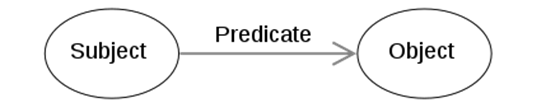


RDF provê uma variedade de notações e formatos de serialização de dados. Uma das notações mais utilizadas atualmente é a Turtle (Terse RDF Triple Language). Turtle provê uma maneira de agrupar os elementos de uma tripla e provê maneiras de abreviar/simplificar tal informação. A Figura 2 apresenta um trecho de código de um arquivo Turtle. Nesse trecho, podemos notar a estrutura da tripla Mark-Twain → author → Huckleberry_Finn.


                                       Figura 2

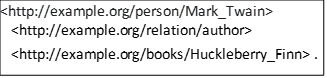



# 3 - A Ontologia Usada

<p>Antes de mostrar como obter dados filtrados com o módulo python rdflib precisa-se entender minimamente como funciona a ontologia Integra Doce. O arquivo transformed_integrado.ttl é o arquivo original do projeto, nele contém todas as informações sobre o Rio Doce. O arquivo example.ttl é um arquivo menor do transformed_integrado para que possa realizar testes e etc... (o arquivo original é muito grande, não tem como realizar testes usando-o). O arquivo de exemplo está disponível no GitHub do projeto e o transformed_integrado ainda não foi postado, pois, está em modificações. 
Levamos em conta no projeto amostras insitu, isto é, medições coletadas no local e medidas por ensaio ou aparelhos.</p>
<p>O diagrama a seguir apresenta a ontologia Integra Doce de modo simplificado, observe que o diagrama leva em conta a herança, que entretanto não é possível fazer diretamente no rdflib. Desse modo, um doce:Agent que é um  gufo:Object herda desse último a função de sujeito em doce:participatedIn, onde o objeto dessa relação é um gufo:Event. Um doce:Measurement é doce:ResearchActivity, que por sua vez é um gufo:Event, então ele herda essa relação como objeto. </p>

<img src="Diagrama Insitu.jpeg">

---
  Figura 1: Diagrama de relações de medições Insitu

---

<p>Na Figura 1 apresentada mostramos o exemplo citado no último parágrafo, além de toda relações na ontologia. Ele foi utilizado para guiar a criação dos filtros, além de analisar as relações que existem no próprio arquivo de instância. No arquivo de instância da ontologia podemos observar também o que foi dito e exposto na figura.


# 4 - **Usando a RDFLib**

<p> É possível obter suporte para a biblioteca no <a href="https://rdflib.readthedocs.io/en/stable/index.html">site da RDFLib</a>, contando com diversos tutoriais em inglês. Esse tutorial foi elaborado com base nesse guia e também criado de acordo com a necessidade de pesquisa da ontologia.

# 4.1 - **Inicializando a Ontologia**

<p> O formato básico dos dados na RDFlib é um grafo não ordenado formado por triplas RDF, desse modo eles podem pesquisar 
por informações estruturadas nessas triplas e retorná-las. Em linguagem Python elas são tuplas de 3 itens, ou nós. 
Um exemplo de inicialização de uma Ontologia é apresentado no código 1, onde cria-se os dados de uma entidade com base 
na Ontologia FOAF, disponível online. </p>

---
 Código 1: Método de Inicialização Manual de uma Ontologia
 
---

In [ ]:
from rdflib import Graph, Literal, RDF, URIRef
# rdflib possui nativamente diversos namespace como W3C ontologies, schema.org e etc.
from rdflib.namespace import FOAF , XSD

# Criando o Grafo
g = Graph()

# Criando o nó a partir de URI que será usado para objeto de diversas triplas
donna = URIRef("http://example.org/donna")

# Utilizando o método add() para adicionar as triplas
g.add((donna, RDF.type, FOAF.Person))
g.add((donna, FOAF.nick, Literal("donna", lang="en")))
g.add((donna, FOAF.name, Literal("Donna Fales")))
g.add((donna, FOAF.mbox, URIRef("mailto:donna@example.org")))

# Alternativamente, é possível iterar as triplas e imprimi-las.
for s, p, o in g:
    print(f"SUJEITO: {s}\nPREDICADO: {p}\nOBJETO: {o}\n\n")


<p> No código 1, o grafo é criado com o método Graph(), que inicia um grafo g. A função URIRef() passa a referência de um nó para uma variável e o método Graph.add(triple: Tuple[rdflib.term.Node, rdflib.term.Node, rdflib.term.Node]) adiciona uma tripla ao grafo. A iteração na linha 18 imprime na tela todos os nós criados. <p>

# 4.2 - **Serializando a Ontologia**

<p> É possível ler arquivos com Ontologias a partir da função rdflib.Graph.parse(), podendo ser de um arquivo na máquina ou dado remoto a partir de uma URL. Também é possível salvar uma Ontologia atual com a função rdflib.Graph.serialize(), que aceita como argumentos destination, format, base e encoding. </p>

<p> No código 2 a seguir, é feita a leitura de um arquivo no diretório atual de um arquivo turtle e em seguida de um arquivo remoto, ou seja, apresenta o carregamento do turtle através dos métodos por repositório local e de armazenamento remoto, é impresso no terminal e depois é salvo no diretório o segundo grafo lido em um arquivo xml. </p>

---

*   Item da lista
*   Item da lista


 Código 2: Leitura e Gravação de arquivos de uma Ontologia

---

In [ ]:
from rdflib import Graph, Literal, RDF, URIRef

#Leitura de um arquivo no diretório local no formato n-triple
g = Graph()
g.parse("unespInst.ttl")

# Leitura de Grafos da Internet
h = Graph()
h.parse("https://raw.githubusercontent.com/nemo-ufes/doce/master/doce.ttl", format="ttl")

# Imprimir todo o Grafo no formato RDF Turtle na tela
print(h.serialize(format="turtle"))

#Salvando o grafo no diretório local
h.serialize(destination="doce", format="xml")

# Criar uma tripla com todos os tipos presentes na ontologia
# Relação <predicado> is a <objeto>
print("Triplas em Unesp.ttl:",len(g))
savedTriple = Graph()
savedTriple += g.triples((None, RDF.type, None))

#Salvar em um arquivo turtle o novo grafo
print("Triplas em Medições:", len(savedTriple))
savedTriple.serialize(destination="F:/Users/User/Desktop/integradoce/types.ttl")


<Graph identifier=Nf763f27472cf45b5abf51044d8019828 (<class 'rdflib.graph.Graph'>)>

<p> O código 2 apresenta dois usos de  Graph.serialize(destination = None, encoding = 'utf-8', format = 'xml', **args), o primeiro é para imprimir toda o grafo na tela e o segundo é para salvar o grafo como uma ontologia no armazenamento local.</p>
<p> A biblioteca RDFLib permite o uso das triplas manipulando códigos em Python, permitindo automatizar inserções e também pesquisas a partir de um algoritmo complexo.</p>

# 4.3 - Criando Namespace

<p> Quando cria-se uma ontologia com o RDFLib, pode-se atribuir um namespace, isto é, vincular os nomes de uma ontologia existente a um delimitador existente através de um prefixo. Esse vínculo é feito através da função rdflib.Graph.bind(prefix, namespace, override=True, replace=False), observe que o namespace pode ser um dos padrões carregados pela rdflib e que prefix é geralmente o nome do namespace. </p>
<p> Observe que além de criar triplas é possível alterá-las e removê-las, para isso existem as funções rdflib.Graph.set(triple), da mesma forma que a função  rdflib.Graph.add(triple), e a função rdflib.Graph.remove(triple). O Código 3 mostra como navegar em triplas com nós e classes criados na ontologia. </p>


---
  Código 3: Método de uso da URI e em armazenamento

---

In [ ]:
from rdflib import Graph 

# Criando grafo
g = Graph()
savedTriple = Graph()

# Carregando no grafo
g.parse("http://purl.org/nemo/doce", format="ttl")

# Criando namespace
doce = URIRef("http://purl.org/nemo/doce#")
DOCE = Namespace(doce)

# Criar uma tripla com todos os tipos presentes na ontologia
# Relação <predicado> is a River
print("Triplas em doce.ttl:",len(g))
savedTriple += g.triples((None, RDF.type, DOCE.River))

# Salvar em um arquivo turtle
print("Triplas em Medições:", len(savedTriple))
savedTriple.serialize(destination="F:/Users/User/Desktop/integradoce/types.ttl")


<p> O Código 3 carrega primeiro a ontologia doce a partir do repositório da ontologia e cria o Namespace para doce, para poder identificar um nó dessa clase, e em seguida, serializamos as relações em que o Objeto é um DOCE.River.</p>

# 4.4 - Navegando pelas triplas

<p> O RDFLib permite navegar por triplas específicas ao iterar por triplas de uma ontologia. Desse modo, é possível usar coringas, variáveis do tipo “None”, e termos específicos, permitindo que a busca seja realizada somente nas triplas que contêm esse nome na posição passada na função. O código 4 exemplifica esse uso utilizando uma ontologia da W3C que organiza pessoas da empresa.</p>


---
  Código 4: Método Triples

---

In [ ]:
# Importar e carregar o gráfico a partir da internet
from RDFlib import Graph
from rdflib.namespace import FOAF

# Criando grafo
g = Graph()
g.parse("http://www.w3.org/People/Berners-Lee/card")

# Encontrar todos sujeitos do tipo pessoa
for s, p, o in g.triples((None, RDF.type, FOAF.Person)):
    print(f"{s} is a person")


</p> O código 4 usa o método Graph.triples(triple: Tuple[Optional[rdflib.term.Node], Union[None, rdflib.paths.Path, rdflib.term.Node], Optional[rdflib.term.Node]]) para criar o grupo de triplas no qual será iterado a pesquisa. Desse modo é possível pesquisar em uma união de conjuntos através de uma iteração, especificada por um caminho ou um dos Nós do grafo.</p>
<p>Para procurar em um nó da ontologia Doce, primeiro devemos passar a URI da ontologia, para poder usar do método FOAF.Person, que não é possível de forma direta. Desse modo, o mesmo iterador do código 4 ficaria como no código 5 para a classe River da ontologia doce. </p>


---
  Código 5: Navegando com uso de triples

---

In [ ]:
from rdflib import Namespace, Graph,, URIRef
from rdflib.namespace import RDF

# criando grafo
g = Graph()
onto = g.parse("https://raw.githubusercontent.com/nemo-ufes/doce/master/doce.ttl", format="ttl");

# criando Namespace
doce = URIRef(“http://purl.org/nemo/doce#”)
DOCE = Namespace(doce)

# relações em que sujeito é do tipo River
for s, p, o in g.triples((None, RDF.type, DOCE.River)):
    print(f"\n< {s} >, < {p} >, < {o} >\n")


<p> Desse modo é possível procurar por um atributo representado por um nó ou mesmo um tipo de relação, representada por uma aresta do grafo. O grafo g carregado com a ontologia Doce Water Quality é iterada no exemplo com o uso do método específicado triples, que usa um ou dois nós como pré-definição e passa por todas as triplas que completam o parâmetro passado.  </p>
<p> Outro método de busca é Graph.value(subject=None, predicate=rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#value'), object=None, default=None, any=True), que busca diretamento o valor do objeto para dois nós de sujeito e predicados passados como parametro e sabe-se que os pares tem somente um valor.</p>

---
  Código 6: Obter nós de grafos da ontologia

---

In [ ]:

from rdflib import Namespace, Graph
from rdflib.namespace import RDF

#Criação do Grafo g e carregamento de Doce Water Ontology
g = Graph()
g.parse("https://raw.githubusercontent.com/nemo-ufes/doce/master/doce.ttl", format="ttl");

#Criando Namespace da ontologia doce e de rdfs
doce = URIRef("http://purl.org/nemo/doce#")
DOCE = Namespace("http://purl.org/nemo/doce#")
rdfs = URIRef("http://www.w3.org/2000/01/rdf-schema#")
RDFS = Namespace(rdfs)

# Busca por objetos que sejam um tipo comentário (comentário pertence a RDFS) e
# comentem a classe rio
aux = g.value(DOCE.River, RDFS.comment)
print(f"Sujeito: \n---\n{aux}\n---")


<p> O código 6 ilustra a busca por um objeto comentário pertencente a tripla passada como parâmetro da função value e retornado para a variável aux. Observe que o Namespace que nos trabalhamos aqui é o do Projeto Doce, ele não está presente no rdflib, então é preciso criar uma variável que chamamos de DOCE para poder usar os métodos dela para usar as URI como na linha 17.</p>

# 4.5 - Obtendo dados na integradoce


<p>No diagrama a seguir poderíamos relacionar o objeto doce:RioDoce, que é um doce:River, com uma doce:Measument através de gufo:participatedIn, porém ao iterar com o método triples só obtemos resultados relações com sujeito doce:RioDoce, predicado doce:ParticipatedIn e objeto NULL se usarmos diretamente doce:Measurement, não obtendo resultados ao pesquisar com gufo:Event que é a classe a qual pertence doce:mEasurement.</p>

<pre>
###  http://purl.org/nemo/doce#Agent
:Agent rdf:type owl:Class ;
       rdfs:subClassOf gufo:Object ;
       rdfs:comment "A gufo:Object capable of performing actions, typically a person or an organization."@en ;
       rdfs:label "Agent"@en .
       
###  http://purl.org/nemo/gufo#Object
gufo:Object rdf:type owl:Class ;
            rdfs:subClassOf gufo:Endurant ;
            rdfs:label "Object"@en .

###  http://purl.org/nemo/doce#ResearchActivity
:ResearchActivity rdf:type owl:Class ;
                  rdfs:subClassOf :GeographicallyLocatedEntity ,
                                  gufo:Event ;              
                    rdfs:label "ResearchActivity"@en .
                    
###  http://purl.org/nemo/doce#Measurement
:Measurement rdf:type owl:Class ;
             rdfs:subClassOf :ResearchActivity ;
             rdfs:label "Measurement"@en .
             
###  http://purl.org/nemo/gufo#participatedIn
gufo:participatedIn rdf:type owl:ObjectProperty ;
                    rdfs:domain gufo:Object ;
                    rdfs:range gufo:Event ;
                    rdfs:label "participatedIn"@en .
</pre>

<p>As triplas com sujeito doce:RioDoce declaram que ele é um doce:River através do predicado rdf:type, e por sua vez as triplas com sujeito :River declaram que ele é um doce:NaturalGeographicFeature através do predicado rdfs:subClassOf. Seguindo o mesmo princípio, doce:NaturalGeographicFeature é subclasse (rdf:subClassOf) de owl:GeographicFeature, esta que é subclasse de doce:GeographicallyLocatedEntity, que é subclasse de gufo:Concreteindividual. </p>

<p>De acordo com o diagrama da Figura 1, isso quer dizer que um River tem a propriedade doce:participatedIn com objeto gufo:Event, pois ela deveria relacionar um gufo:Object com um gufo:Event, a ser respectivamente doce:RioDoce e um doce:Measurement. O esquema a seguir trás as instâncias que geraram essa colocação.</p>

<pre> 
###  http://purl.org/nemo/doce#RioDoce
:RioDoce rdf:type owl:NamedIndividual ,
                  :River .

###  http://purl.org/nemo/doce#River
:River rdf:type owl:Class ;
       rdfs:subClassOf :NaturalGeographicFeature ,
                       :SurfaceWaterFeature ;
       rdfs:comment """A natural doce:SurfaceWaterFeature in which water runs due to gravity.

###  http://purl.org/nemo/doce#NaturalGeographicFeature
:NaturalGeographicFeature rdf:type owl:Class ;
                          rdfs:subClassOf :GeographicFeature ;
                          rdfs:comment """A natural doce:GeographicFeature. 

###  http://purl.org/nemo/doce#GeographicallyLocatedEntity
:GeographicallyLocatedEntity rdf:type owl:Class ;
                             rdfs:subClassOf gufo:ConcreteIndividual .

###  http://purl.org/nemo/gufo#ConcreteIndividual
gufo:ConcreteIndividual rdf:type owl:Class ;
                        rdfs:subClassOf gufo:Individual ;
                        owl:disjointUnionOf ( gufo:Endurant
                                              gufo:Event
                                              gufo:Situation
                                            ) ;
                        rdfs:label "ConcreteIndividual"@en .
                        
###  http://purl.org/nemo/gufo#Individual
gufo:Individual rdf:type owl:Class ;
                owl:disjointWith gufo:Type ;
                owl:disjointUnionOf ( gufo:AbstractIndividual
                                      gufo:ConcreteIndividual
                                    ) ;
                rdfs:label "Individual"@en .
                        
###  http://purl.org/nemo/gufo#Endurant
gufo:Endurant rdf:type owl:Class ;
              rdfs:subClassOf gufo:ConcreteIndividual ;
              owl:disjointUnionOf ( gufo:Aspect
                                    gufo:Object
                                  ) ;
              rdfs:label "Endurant"@en .
              
</pre>

<p>Desse modo, para elaborar filtros deve levar em conta as instâncias declaradas dentro do código previamente, já que não há inferência dentro do grafo. Isso quer dizer que, como dito anteriormente, para encontrar uma doce:Measurement é necessário procurar diretamente por ela, apesar dela ser da classe gufo:Event não aparecerá resultados ao pesquisar no arquivo de instância por gufo:Event.</p>

# 5 - Funções

<p> O código 8 a seguir apresenta a função de pesquisa por data, onde dado um período de início de fim busca-se dentre as doce:Measurement as que tem marca de tempo dentro do intervalo passado e devolve para um gráfico os valores encontrados. As observações na sessões anteriores são levadas em conta e o valor retornado na função é um grafo com o filtro de pesquis por data.</p>

---
  Código 8: Pesquisa em intervalo de data

---

In [ ]:
def pesqTempo (graph, ini, fin):
  # cria um grafo 
    x = Graph()

    # itera no gráfico, pegando o sujeito como predicado do tipo RDF e objeto da relação do tipo Measurement
    for s1, p1, o1 in graph.triples((None, RDF.type, DOCE.Measurement)) :

      # itera no gráfico, utilizando o sujeito obtido no laço anterior, pegando como predicado a relação
      # "hasBeginPointInXSDDDateTimeStamp" e tendo como resultado o objeto. (data inicial)
        for s2, p2, o2 in graph.triples((s1, GUFO.hasBeginPointInXSDDateTimeStamp, None)) :

            # transforma a data inicial em string para realizar as comparações e retirar as incompatibilidades do arquivo
            dateo2 = str(o2)

            # sufixo de fuso horário GMT-2 removido por conflito com isoformat
            dateo2 = dateo2.replace('-0200', '')
            dateo2 = dateo2.replace('-0300', '') 

            # cria uma variavel de comparação utilizando a biblioteca isoformat do python
            dateComp = datetime.fromisoformat(dateo2)

            # faz as comparações obtidas com as informações passadas pelo usuário da data inicial
            if ((dateComp.year >= ini.year) and (dateComp.year <= fin.year) and (dateComp.month >= ini.month) and 
                (dateComp.month <= fin.month) and (dateComp.day >= ini.day) and (dateComp.day <= fin.day)) :

                 # itera no gráfico, utilizando o sujeito obtido no laço anterior, pegando como predicado a relação
                 # "hasEndPointInXSDDDateTimeStamp" (Propriedade de data final) e tendo como resultado o objeto. (data final)
                for s21, p21, o21 in graph.triples((s1, GUFO.hasEndPointInXSDDateTimeStamp, None)) :
                    # transforma a data inicial em string para realizar as comparações e retirar as incompatibilidades do arquivo
                    dateo2 = str(o21)

                    # sufixo de fuso horário GMT-2 removido por conflito com isoformat
                    dateo2 = dateo2.replace('-0200', '') 
                    dateo2 = dateo2.replace('-0300', '') 

                    # cria uma variavel de comparação utilizando a biblioteca isoformat do python
                    dateComp = datetime.fromisoformat(dateo2)

                     # faz as comparações obtidas com as informações passadas pelo usuário da data final
                    if ((dateComp.year >= ini.year) and (dateComp.year <= fin.year) and (dateComp.month >= ini.month) and 
                (dateComp.month <= fin.month) and (dateComp.day >= ini.day) and (dateComp.day <= fin.day)) :
                        x.add((s1, p1, o1))
                        # laços para adicionar instâncias com sujeito a doce:measurement encontrada
                        for s3, p3, o3 in graph.triples((None, GUFO.participatedIn, s1)) :
                            x.add((s3, p3, o3))
                        for s3, p3, o3 in graph.triples((s1, DOCE.locatedIn, None)) :
                            x.add((s3, p3, o3))
                        for s3, p3, o3 in graph.triples((s1, DOCE.measured, None)) :
                            x.add((s3, p3, o3))
                        for s3, p3, o3 in graph.triples((s1, DOCE.measuredQualityKind, None)) :
                            x.add((s3, p3, o3))  
                        for s3, p3, o3 in graph.triples((s1, DOCE.expressedIn, None)) :
                            x.add((s3, p3, o3))
                        for s3, p3, o3 in graph.triples((s1, GUFO.hasQualityValue, None)) :
                            x.add((s3, p3, o3)) 
                            
                    x.add((s21, p21, o21))
                    x.add((s2, p2, o2))
                    
    # retorna o grafo com todos os resultados obtidos.
    return x

<p>Devido a problemas de compatibilidade foi usado uma função para remover o marcador de fuso usado na ontologia. As triplas adicionadas tem sujeito doce:Measurement encontrado no início do laço, então a função percorre todas e devolve ao grafo somente as favoráveis. Para o código 9, o código para encontrar ponto em uma região geográfica do mesmo modo leva-se em conta o intervalo de coordenadas que forma um retângulo e pega os pontos contidos nesse meio.</p>⠀

---
  Código 9: Pesquisa em região geográfica

---

In [ ]:
def pesqLocalizacao(graph, latMin, latMax, longMin, longMax):
    # Cria o grafo
    x = Graph()
    # Flag para indicar que não encontrou resultados
    flag = 1

    # Laço para pegar o sujeito e predicado como objeto utilizado a relação GeographicPoint
    for s1, p1, o1 in graph.triples((None, None, DOCE.GeographicPoint)) :

        # Obtém o valor de latitude e longitude
        lat = graph.value(s1, WGS.lat)
        long = graph.value(s1, WGS.long)

        # Comparação utilizada para saber se os dados passados pelo usuário contém na base de arquivo
        if lat < Literal(latMax, datatype=XSD.float) and lat > Literal(latMin, datatype=XSD.float) :
            if long < Literal(longMax, datatype=XSD.float) and long > Literal(longMin, datatype=XSD.float) :

              # Laço para filtrar os resultados utilizando o predicado da relação locatedIn, e o objeto como o sujeito do primeiro laço (relação GeographicPoint)
                for s4, p4, o4 in graph.triples((None, DOCE.locatedIn, s1)) :

                    # Laço para adicionar o ponto geográfico que tem relação com a medição
                    for s5, p5, o5 in graph.triples((s4, RDF.type, DOCE.Measurement)) :

                        # Laço para adicionar o agente que participou da medição.
                        for s6, p6, o6 in graph.triples((None, GUFO.participatedIn, s5)) :
                            # Encontrou os resultados, começar a adicionar as triplas com sujeito a doce:measurement encontrada.
                            flag=0 
                            x.add((s5, p5, o5))
                            x.add((s6, p6, o6))
                            x.add((s1, p1, o1))

                        # Laços para adicionar instâncias com sujeito a doce:measurement encontrada.
                        for s6, p6, o6 in graph.triples((s5, DOCE.measuredQualityKind, None)) :
                            x.add((s6, p6, o6))
                            for s7, p7, o7 in graph.triples((s5, DOCE.expressedIn, None)) :
                                x.add((s7, p7, o7))
                            for s3, p3, o3 in graph.triples((s1, DOCE.measured, None)) :
                                x.add((s3, p3, o3))
                            for s7, p7, o7 in graph.triples((s5, DOCE.hasQualityValue, None)) :
                                x.add((s7, p7, o7))
                            for s7, p7, o7 in graph.triples((s5, DOCE.hasBeginPointInXSDDateTimeStamp, None)) :
                                x.add((s7, p7, o7))


    # Caso não encontre resultados com as informações passadas, é mostrado na tela que não foram encontrados resultados.
    if flag :
        print("\nNão foram encontrados resultados")

    # Retorna o grafo resultante.
    return x

⠀⠀<p>De modo semelhante, o gráfico retornado possui as instâncias do arquivo original porém com a região limitada. A comparação com a função Graph.Literal() foi necessária para evitar erro por compatibilidade entre o objeto do grafo e a string. Os códigos 10 e 11 apresentam as funções de pesquisa por qualidade medida e por agente responsável. Ambas são mais simples e semelhantes ao que já foi feito, recebem um valor para comprarar, procuram entre as doce:Measurement uma que tenha um objeto com valor semelhante e passam os dados dessa instância para o programa.</p>⠀

---
  Código 10: Pesquisa por qualidade medida

---

In [ ]:
def pesqQualidade(exampleTriples, qualk):
    # Cria o grafo
    x = Graph()
    # Flag para indicar que não encontrou resultados
    flag = 1
    
    # Laço para obter como sujeito, o predicado do tipo RDF e o objeto da relação Measurement
    for s1, p1, o1 in exampleTriple.triples((None, RDF.type, DOCE.Measurement)) :

        # Laço utilizado para obter o objeto, tendo como sujeito o resultante do laço anterior e o predicado
        # Da relação do tipo measuredQualityKind
        for s2, p2, o2 in exampleTriple.triples((s1, DOCE.measuredQualityKind, None)) :

            # Cria uma variável med (medição) e o transforma em string
            med = str(o2)
            med = med.replace(str(DOCE),"")

            # Faz a comparação da qualidade passada pelo usuário e da medição obtida
            if qualk in med :
                # Laços para adicionar instâncias com sujeito a doce:measurement encontrada
                for s3,p3,o3 in exampleTriple.triples((None, GUFO.participatedIn, s1)) :
                    # Adiciona no grafo os resultados obtidos 
                    x.add((s1, p1, o1))
                    x.add((s3, p3, o3))
                for s3,p3,o3 in exampleTriple.triples((s1, DOCE.locatedIn, None)) :
                    x.add((s3, p3, o3))
                x.add((s2, p2, o2))
                for s3,p3,o3 in exampleTriple.triples((s1, DOCE.expressedIn, None)) :
                    x.add((s3, p3, o3))
                for s3, p3, o3 in exampleTriple.triples((s1, DOCE.measured, None)) :
                    x.add((s3, p3, o3))
                for s3,p3,o3 in exampleTriple.triples((s1, GUFO.hasQualityValue, None)) :
                    x.add((s3, p3, o3))
                for s3,p3,o3 in exampleTriple.triples((s1, GUFO.hasBeginPointInXSDDateTimeStamp, None)) :
                    x.add((s3, p3, o3))
                    
    # Caso não encontre resultados com as informações passadas, é mostrado na tela que não foram encontrados resultados.
    if flag :
        print("\nNão foram encontrados resultados")

    # Retorna o grafo resultante
    return x

---
  Código 11: Função pesquisa por qualidade medida

---

In [ ]:
def PesqAgent(exampleTriple, pesquisa):
    # Cria o grafo
    x = Graph()
    # Flag para indicar que não encontrou resultados
    flag = 1
    

    # Laço para filtrar o sujeito, tendo como predicado o tipo RDF, e o objeto a relação Agent
    for s1, p1, o1 in exampleTriple.triples((None, RDF.type , DOCE.Agent)) :

        # Cria uma variável de laboratório e transforma em string
        lab = str(s1)
        lab = lab.replace(str(DOCEEX),"")

        # faz a comparação se o dado passado pelo usuário está presente na base de dados
        if pesquisa in lab :

            # laço para filtrar o objeto, o sujeito é o resultante do primeiro laço e o predicado da relação participatedIn
            for s2, p2, o2 in exampleTriple.triples((s1, GUFO.participatedIn, None)) :


                # cria uma variável de laboratório e transforma em string
                med = str(o2)
                med = med.replace(str(DOCEEX),"")
                
                # adicionar instâncias com sujeito a doce:measurement encontrada
                x.add((o2, RDF.type, DOCE.Measurement))
                x.add((s2, p2, o2))
                for s3, p3, o3 in exampleTriple.triples((o2, DOCE.locatedIn, None)) :
                    x.add((s3, p3, o3))
                for s3, p3, o3 in exampleTriple.triples((o2, DOCE.measuredQualityKind, None)) :
                    x.add((s3, p3, o3))
                for s3, p3, o3 in graph.triples((s1, DOCE.measured, None)) :
                    x.add((s3, p3, o3))
                for s3, p3, o3 in exampleTriple.triples((o2, DOCE.expressedIn, None)) :
                    x.add((s3, p3, o3))
                for s3, p3, o3 in exampleTriple.triples((o2, GUFO.hasQualityValue, None)) :
                    x.add((s3, p3, o3))
                for s3, p3, o3 in exampleTriple.triples((o2, GUFO.hasBeginPointInXSDDateTimeStamp, None)) :
                    x.add((s3, p3, o3))

    # Caso não encontre resultados com as informações passadas, é mostrado na tela que não foram encontrados resultados.
    if flag :
        print("\nNão foram encontrados resultados")
        
    # retorna o grafo resultante
    return x

# 6 - Materiais e Links Relacionados

O Projeto Integradoce

A Ontologia de Qualidade da Água do Rio Doce

gUFO: A Lightweight Implementation of the Unified Foundational Ontology (UFO)
